<a href="https://colab.research.google.com/github/novaauliyah/coba-uprak/blob/main/SMOTE_%2B_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Import Dataset

In [2]:
# Membaca data dari file xlsx atau jika data berupa list, maka kita buat
# DataFrame
df= pd.read_excel('Dataset Diabetes.xlsx')

df.head()

,Unnamed: 0,No,Usia,Gula Darah Acak,Gula Darah Puasa,Gula Darah 2 Jam PP,Hba1C,BMI,Aktivitas Fisik,Sistolik,Diastolik,Diagnosa
0,0,1,64,93,102,220,8.5,33.6,1,175,96,DM Tipe 2
1,1,2,49,108,115,180,7.0,26.6,1,150,70,DM Tipe 1
2,2,3,56,186,126,300,9.0,23.3,1,174,96,DM Tipe 2
3,3,4,57,255,137,250,8.0,28.1,1,110,60,DM Tipe 2
4,4,5,42,292,148,190,7.5,43.1,1,104,63,DM Tipe 2


In [3]:
df.drop(['Unnamed: 0', 'No'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Usia                 564 non-null    int64  
 1   Gula Darah Acak      564 non-null    int64  
 2   Gula Darah Puasa     564 non-null    int64  
 3   Gula Darah 2 Jam PP  564 non-null    int64  
 4   Hba1C                564 non-null    float64
 5   BMI                  564 non-null    float64
 6   Aktivitas Fisik      564 non-null    int64  
 7   Sistolik             564 non-null    int64  
 8   Diastolik            564 non-null    int64  
 9   Diagnosa             564 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 44.2+ KB


In [4]:
# Mengubah diagnosa menjadi angka sesuai dengan kriteria yang diberikan
df['Diagnosa Angka'] = df['Diagnosa'].apply(lambda x: 1 if x == 'DM Tipe 2' else 2 if x == 'DM Tipe 1' else 0)
df.head()

,Usia,Gula Darah Acak,Gula Darah Puasa,Gula Darah 2 Jam PP,Hba1C,BMI,Aktivitas Fisik,Sistolik,Diastolik,Diagnosa,Diagnosa Angka
0,64,93,102,220,8.5,33.6,1,175,96,DM Tipe 2,1
1,49,108,115,180,7.0,26.6,1,150,70,DM Tipe 1,2
2,56,186,126,300,9.0,23.3,1,174,96,DM Tipe 2,1
3,57,255,137,250,8.0,28.1,1,110,60,DM Tipe 2,1
4,42,292,148,190,7.5,43.1,1,104,63,DM Tipe 2,1


In [5]:
df['Diagnosa'].value_counts()

Diagnosa
DM Tipe 2    341
DM Tipe 1    172
Normal        51
Name: count, dtype: int64

In [6]:
df.tail()

,Usia,Gula Darah Acak,Gula Darah Puasa,Gula Darah 2 Jam PP,Hba1C,BMI,Aktivitas Fisik,Sistolik,Diastolik,Diagnosa,Diagnosa Angka
559,34,134,73,126,5.0,20.0,0,110,69,Normal,0
560,33,100,80,117,4.3,20.0,1,97,73,Normal,0
561,35,85,78,81,4.2,21.0,0,93,77,Normal,0
562,50,85,99,86,5.3,23.0,0,118,75,Normal,0
563,55,131,90,135,4.0,18.0,0,120,80,Normal,0


In [7]:
df['Diagnosa Angka'].value_counts()

Diagnosa Angka
1    341
2    172
0     51
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Usia                 564 non-null    int64  
 1   Gula Darah Acak      564 non-null    int64  
 2   Gula Darah Puasa     564 non-null    int64  
 3   Gula Darah 2 Jam PP  564 non-null    int64  
 4   Hba1C                564 non-null    float64
 5   BMI                  564 non-null    float64
 6   Aktivitas Fisik      564 non-null    int64  
 7   Sistolik             564 non-null    int64  
 8   Diastolik            564 non-null    int64  
 9   Diagnosa             564 non-null    object 
 10  Diagnosa Angka       564 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 48.6+ KB


In [9]:
df.dtypes.value_counts()

int64      8
float64    2
object     1
Name: count, dtype: int64

In [10]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Usia                   0
Gula Darah Acak        0
Gula Darah Puasa       0
Gula Darah 2 Jam PP    0
Hba1C                  0
BMI                    0
Aktivitas Fisik        0
Sistolik               0
Diastolik              0
Diagnosa               0
Diagnosa Angka         0
dtype: int64

In [11]:
# Mengecek baris yang duplikat
df.duplicated().sum()

0

In [12]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in df.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        df[feature].nunique()
    )

- Jumlah unique value pada kolom `Usia`: 67
- Jumlah unique value pada kolom `Gula Darah Acak`: 179
- Jumlah unique value pada kolom `Gula Darah Puasa`: 172
- Jumlah unique value pada kolom `Gula Darah 2 Jam PP`: 78
- Jumlah unique value pada kolom `Hba1C`: 45
- Jumlah unique value pada kolom `BMI`: 231
- Jumlah unique value pada kolom `Aktivitas Fisik`: 2
- Jumlah unique value pada kolom `Sistolik`: 55
- Jumlah unique value pada kolom `Diastolik`: 46
- Jumlah unique value pada kolom `Diagnosa`: 3
- Jumlah unique value pada kolom `Diagnosa Angka`: 3


In [13]:
df.describe()

,Usia,Gula Darah Acak,Gula Darah Puasa,Gula Darah 2 Jam PP,Hba1C,BMI,Aktivitas Fisik,Sistolik,Diastolik,Diagnosa Angka
count,564.00000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,51.10461,145.833333,139.781915,212.037234,7.579734,31.342376,0.420213,126.489362,82.072695,1.214539
std,14.50123,77.201753,59.720578,56.479931,1.146059,7.586629,0.494031,13.853903,10.176072,0.591594
min,18.00000,60.000000,39.000000,70.000000,4.000000,18.000000,0.000000,80.000000,50.000000,0.000000
25%,42.00000,99.000000,100.000000,185.000000,7.100000,25.400000,0.000000,120.000000,75.000000,1.000000
50%,53.00000,117.000000,122.000000,205.000000,7.500000,31.050000,0.000000,125.500000,84.000000,1.000000
75%,61.00000,163.000000,159.000000,230.000000,8.300000,35.900000,1.000000,130.000000,89.000000,2.000000
max,103.00000,538.000000,525.000000,473.000000,11.000000,67.100000,1.000000,208.000000,120.000000,2.000000


# Visualisasi

**Diagram Batang Tipe diabetes**

Diagnosa
DM Tipe 2    341
DM Tipe 1    172
Normal        51
Name: count, dtype: int64


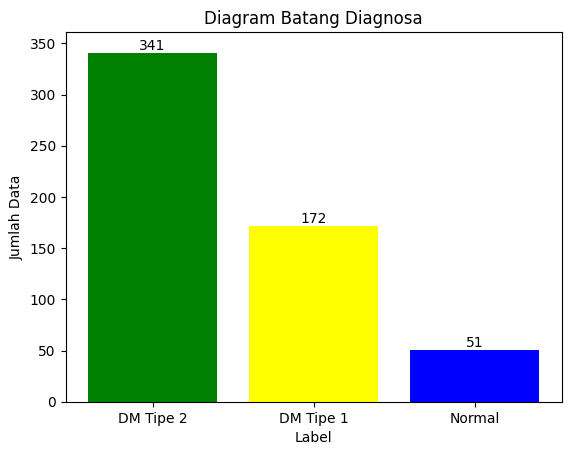

In [14]:
label_counts = df['Diagnosa'].value_counts()
print(label_counts)

# Buat diagram batang
bars = plt.bar(['DM Tipe 2', 'DM Tipe 1', 'Normal'], label_counts, color=['green', 'yellow', 'blue'])

# Tambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Diagram Batang Diagnosa')

# Tampilkan jumlah data di atas setiap bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mengatur batas sumbu y
plt.ylim(0, max(label_counts) + 20)

# Tampilkan diagram
plt.show()

**Rata Rata Setiap Kolom Berdasarkan Diagnosa**

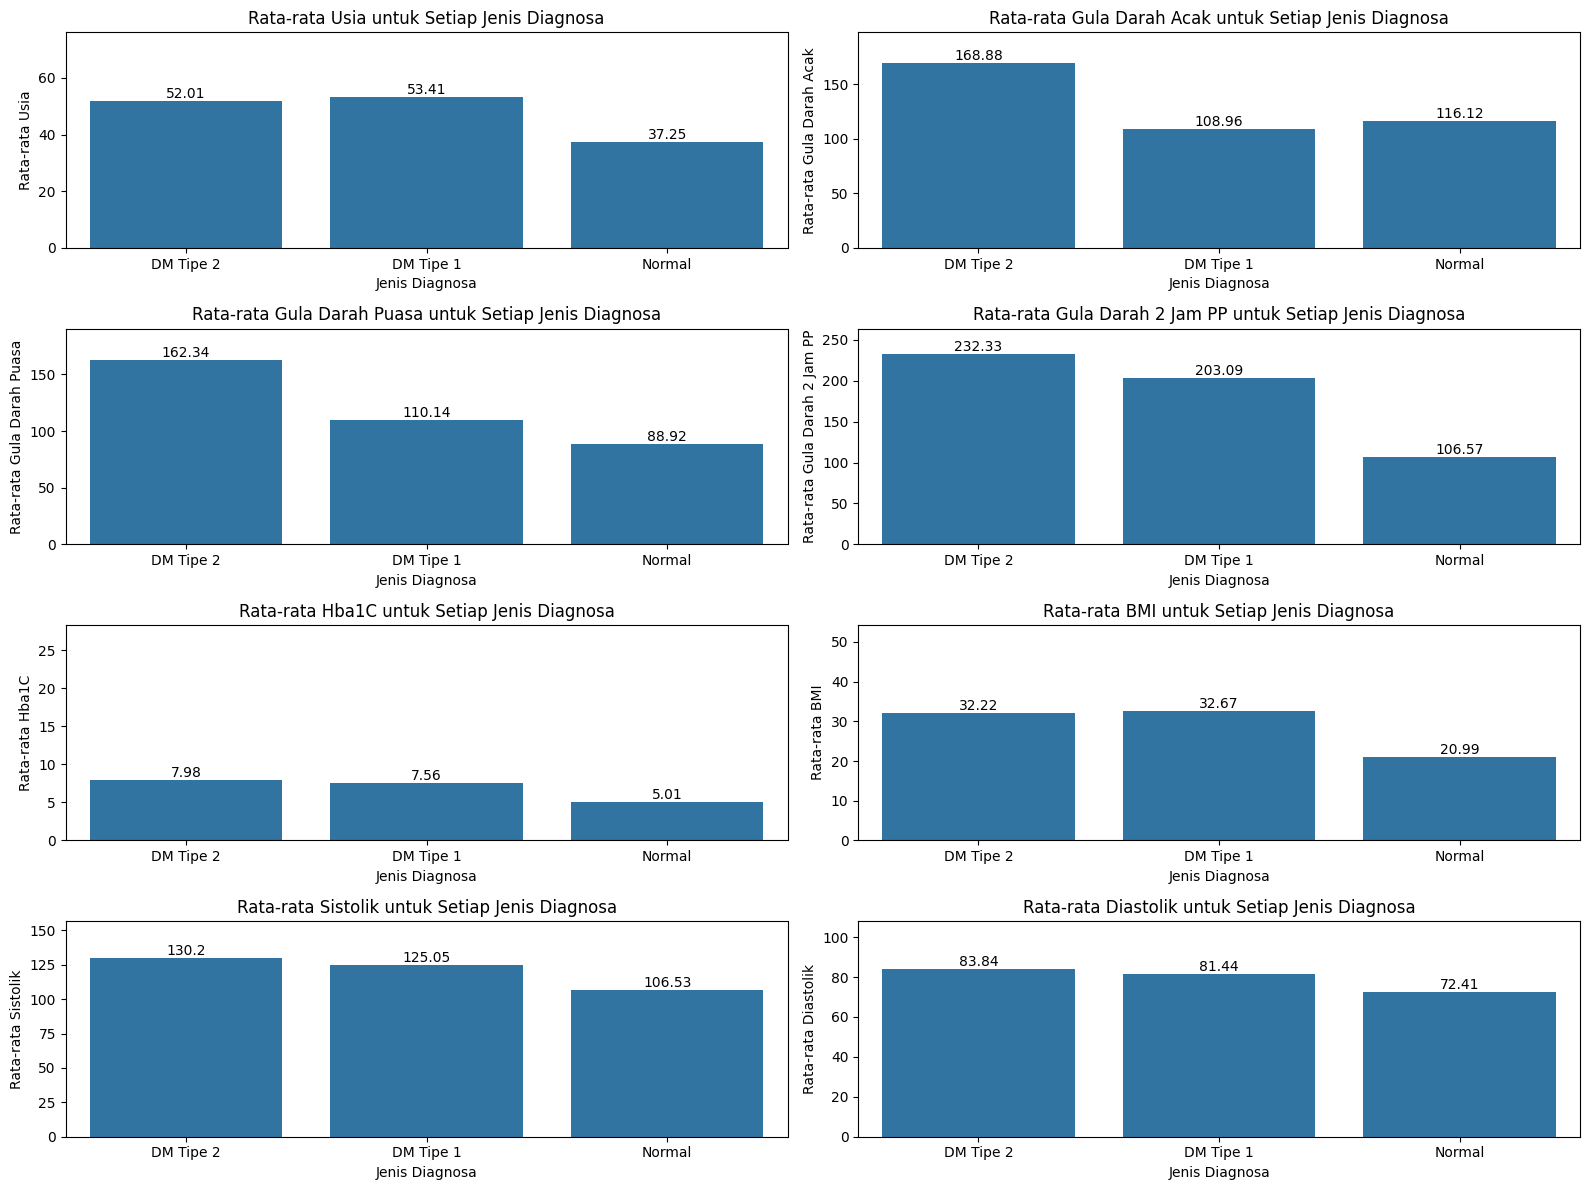

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom yang ingin divisualisasikan
kolom = ['Usia', 'Gula Darah Acak', 'Gula Darah Puasa', 'Gula Darah 2 Jam PP', 'Hba1C', 'BMI', 'Sistolik', 'Diastolik']

# Membuat gambar utama
plt.figure(figsize=(16, 12))

# Iterasi melalui setiap kolom dan membuat subplot
for i, col in enumerate(kolom, 1):
    plt.subplot(4, 2, i)
    ax = sns.barplot(data=df, x='Diagnosa', y=col, errorbar=None)
    plt.title(f'Rata-rata {col} untuk Setiap Jenis Diagnosa')
    plt.ylabel(f'Rata-rata {col}')
    plt.xlabel('Jenis Diagnosa')
    plt.ylim(bottom=0, top=ax.get_ylim()[1] + 20)  # Menambahkan 20 ke nilai maksimum sumbu y
    # Menambahkan label nilai di atas diagram
    for bar in ax.patches:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mengatur tata letak gambar dan menampilkan
plt.tight_layout()
plt.show()


**Korelasi Antar Fitur**

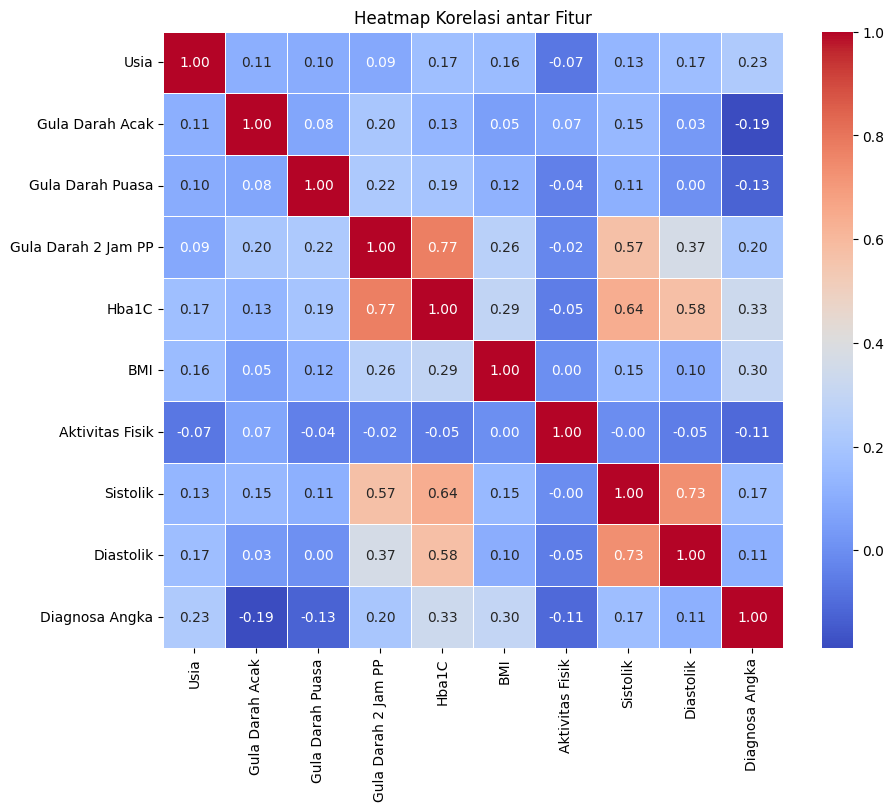

In [16]:
# Pilih hanya kolom-kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Buat visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur')
plt.show()


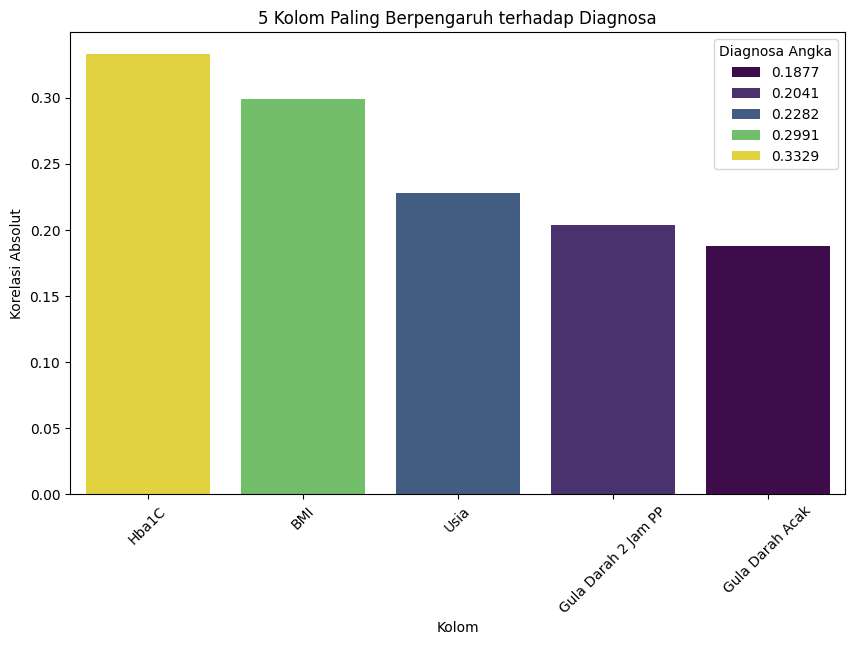

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengurutkan kolom berdasarkan nilai korelasi absolut dengan Potability
correlation = numeric_df.corr()["Diagnosa Angka"].abs().sort_values(ascending=False)
top_5_correlations = correlation[1:6]  # Mengambil 5 teratas, menghindari "Potability" sendiri

# Membuat grafik batang menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_correlations.index, y=top_5_correlations, palette="viridis", hue=round(top_5_correlations, 4))
plt.title("5 Kolom Paling Berpengaruh terhadap Diagnosa")
plt.xlabel("Kolom")
plt.ylabel("Korelasi Absolut")
plt.xticks(rotation=45)
plt.show()

# Split Dataset

In [18]:
# Membagi data menjadi fitur (X) dan target (y)
X = df.drop(['Diagnosa', 'Diagnosa Angka'], axis=1)
y = df['Diagnosa'].reset_index(drop=True)


# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train Dataset:')
print(len(y_train))
print(y_train.value_counts())
print('\n')

print('Validation Dataset:')
print(len(y_test))
print(y_test.value_counts())
print('\n')

Train Dataset:
451
Diagnosa
DM Tipe 2    273
DM Tipe 1    137
Normal        41
Name: count, dtype: int64


Validation Dataset:
113
Diagnosa
DM Tipe 2    68
DM Tipe 1    35
Normal       10
Name: count, dtype: int64




### WITHOUT SMOTE

#### Fase Training

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
Y_pred_train = rfc.predict(X_train)

# Confusion Matrix
conf_matrix = confusion_matrix(y_train, Y_pred_train)
report = classification_report(y_train, Y_pred_train)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report")
print(report)

# Menghitung F1-score, recall, precision, dan accuracy
f1_value = f1_score(y_train, Y_pred_train, average='weighted')
recall = recall_score(y_train, Y_pred_train, average='weighted')
precision = precision_score(y_train, Y_pred_train, average='weighted')
accuracy = accuracy_score(y_train, Y_pred_train)

# Mencetak dengan empat desimal
print(f'F1 Score: {round(f1_value, 4)}')
print(f'Recall: {round(recall, 4)}')
print(f'Precision: {round(precision, 4)}')
print(f'Accuracy: {round(accuracy, 4)}')


Confusion Matrix:
[[137   0   0]
 [  0 273   0]
 [  0   0  41]]

Classification Report
              precision    recall  f1-score   support

   DM Tipe 1       1.00      1.00      1.00       137
   DM Tipe 2       1.00      1.00      1.00       273
      Normal       1.00      1.00      1.00        41

    accuracy                           1.00       451
   macro avg       1.00      1.00      1.00       451
weighted avg       1.00      1.00      1.00       451

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0


#### Fase Validasi


Confusion Matrix:
[[33  2  0]
 [ 6 62  0]
 [ 0  0 10]]

Classification Report
              precision    recall  f1-score   support

   DM Tipe 1       0.85      0.94      0.89        35
   DM Tipe 2       0.97      0.91      0.94        68
      Normal       1.00      1.00      1.00        10

    accuracy                           0.93       113
   macro avg       0.94      0.95      0.94       113
weighted avg       0.93      0.93      0.93       113

F1 Score: 0.93
Recall: 0.9292
Precision: 0.9335
Accuracy: 0.9292


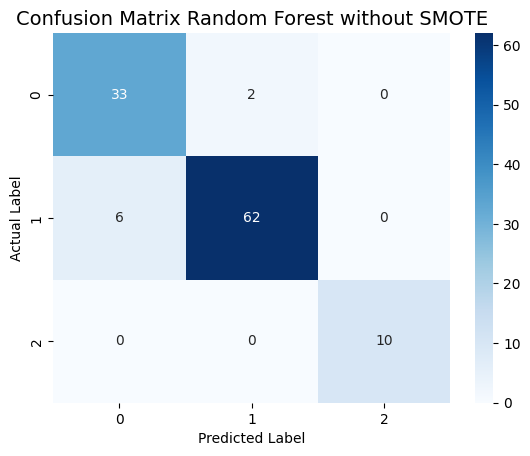

In [21]:
# Confusion Matrix of Random Forest Classifier
Y_pred_rfc = rfc.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, Y_pred_rfc)
report = classification_report(y_test, Y_pred_rfc)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report")
print(report)

# Menghitung F1-score, recall, precision, dan accuracy
f1_value = f1_score(y_test, Y_pred_rfc, average='weighted')
recall = recall_score(y_test, Y_pred_rfc, average='weighted')
precision = precision_score(y_test, Y_pred_rfc, average='weighted')
accuracy = accuracy_score(y_test, Y_pred_rfc)

# Mencetak dengan empat desimal
print(f'F1 Score: {round(f1_value, 4)}')
print(f'Recall: {round(recall, 4)}')
print(f'Precision: {round(precision, 4)}')
print(f'Accuracy: {round(accuracy, 4)}')

cm = confusion_matrix(y_test, Y_pred_rfc)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix Random Forest without SMOTE", fontsize=14, fontname="Helvetica")
plt.show()

               Feature  Importance
2     Gula Darah Puasa    0.330265
1      Gula Darah Acak    0.185195
3  Gula Darah 2 Jam PP    0.184969
4                Hba1C    0.111796
7             Sistolik    0.052423
5                  BMI    0.051754
8            Diastolik    0.039742
0                 Usia    0.033191
6      Aktivitas Fisik    0.010665


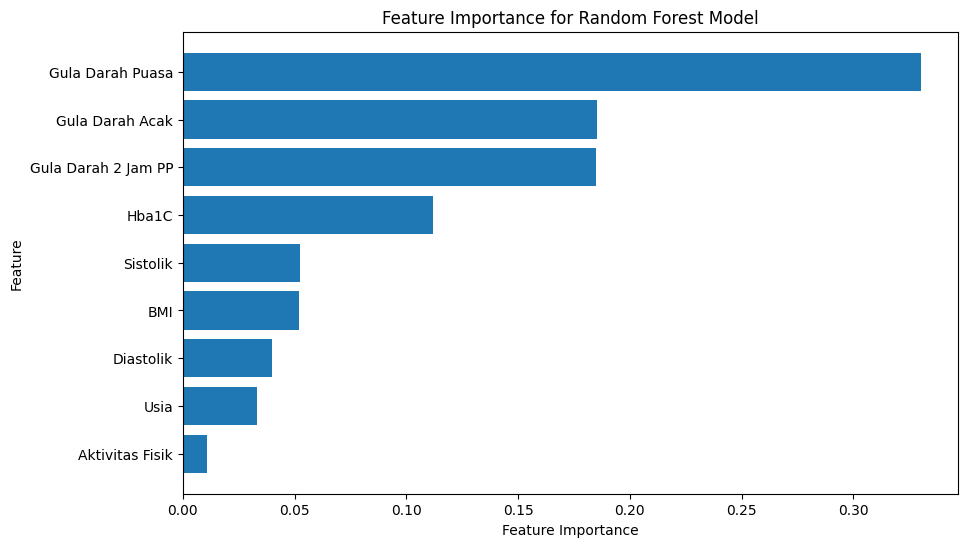

In [22]:
# Mengambil kepentingan fitur
feature_importances = rfc.feature_importances_

# Membuat DataFrame untuk menampilkan kepentingan fitur
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan kepentingan fitur
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan kepentingan fitur
print(feature_importance_df)

# Plot kepentingan fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [23]:
# Konversi y_test dan y_pred menjadi DataFrame
y_test_df = pd.DataFrame(y_test.values, columns=['Actual_Diagnosa'])
y_pred_df = pd.DataFrame(Y_pred_rfc, columns=['Predicted_Diagnosa']).reset_index(drop=True)

# Reset indeks X_test agar sesuai dengan indeks yang sudah direset pada y_test_df dan y_pred_df
X_test_reset = X_test.reset_index(drop=True)

# Gabungkan X_test, y_test_df, dan y_pred_df dalam satu DataFrame
data_uji = pd.concat([X_test_reset, y_test_df, y_pred_df], axis=1)

# Tampilkan DataFrame yang sudah digabungkan
data_uji.head(50)

,Usia,Gula Darah Acak,Gula Darah Puasa,Gula Darah 2 Jam PP,Hba1C,BMI,Aktivitas Fisik,Sistolik,Diastolik,Actual_Diagnosa,Predicted_Diagnosa
0,44,245,71,210,7.0,27.8,0,125,75,DM Tipe 2,DM Tipe 2
1,70,88,145,190,8.2,27.3,0,122,83,DM Tipe 2,DM Tipe 2
2,55,110,106,190,7.0,42.4,1,120,70,DM Tipe 1,DM Tipe 1
3,65,130,106,185,8.6,33.7,0,128,94,DM Tipe 1,DM Tipe 1
4,64,103,180,195,7.3,34.8,0,125,82,DM Tipe 2,DM Tipe 2
5,60,195,371,280,8.5,40.7,0,140,90,DM Tipe 2,DM Tipe 2
6,68,79,100,195,8.0,27.3,1,125,91,DM Tipe 1,DM Tipe 1
7,54,134,81,127,4.7,21.0,1,90,71,Normal,Normal
8,72,125,120,215,8.6,43.6,1,125,89,DM Tipe 1,DM Tipe 1
9,62,332,130,290,8.0,28.0,0,125,75,DM Tipe 2,DM Tipe 2


Predicted_Diagnosa
DM Tipe 2    64
DM Tipe 1    39
Normal       10
Name: count, dtype: int64


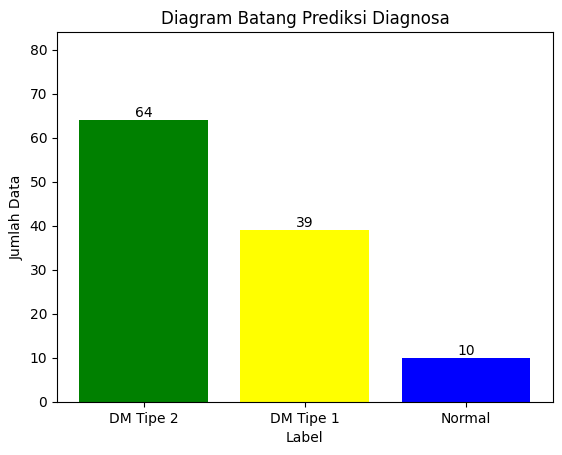

In [24]:
label_counts = data_uji['Predicted_Diagnosa'].value_counts()
print(label_counts)

# Buat diagram batang
bars = plt.bar(['DM Tipe 2', 'DM Tipe 1', 'Normal'], label_counts, color=['green', 'yellow', 'blue'])

# Tambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Diagram Batang Prediksi Diagnosa')

# Tampilkan jumlah data di atas setiap bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mengatur batas sumbu y
plt.ylim(0, max(label_counts) + 20)

# Tampilkan diagram
plt.show()

In [25]:
import pickle

# Menyimpan model ke dalam file
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(rfc, file)

### WITH SMOTE

In [26]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [27]:
# Define smote
oversampling = SMOTE(random_state=42)

# Fit the over sampling
X_smote, Y_smote = oversampling.fit_resample(X_train, y_train)

print('Original dataset shape is ', Counter(y))
print('Resample dataset shape is ', Counter(Y_smote))

Original dataset shape is  Counter({'DM Tipe 2': 341, 'DM Tipe 1': 172, 'Normal': 51})
Resample dataset shape is  Counter({'DM Tipe 2': 273, 'DM Tipe 1': 273, 'Normal': 273})


Diagnosa
DM Tipe 2    273
DM Tipe 1    273
Normal       273
Name: count, dtype: int64


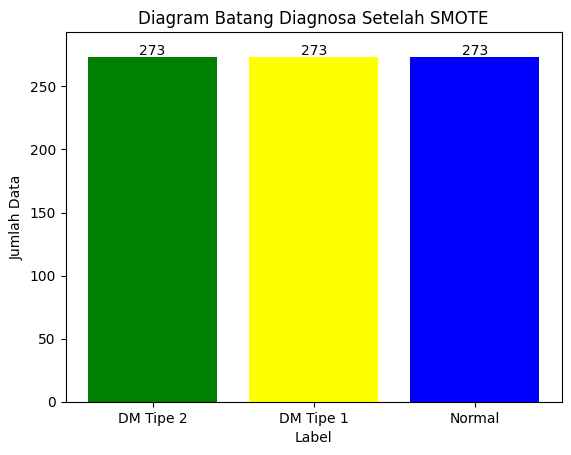

In [28]:
label_counts = Y_smote.value_counts()
print(label_counts)

# Buat diagram batang
bars = plt.bar(['DM Tipe 2', 'DM Tipe 1', 'Normal'], label_counts, color=['green', 'yellow', 'blue'])

# Tambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Diagram Batang Diagnosa Setelah SMOTE')

# Tampilkan jumlah data di atas setiap bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mengatur batas sumbu y
plt.ylim(0, max(label_counts) + 20)

# Tampilkan diagram
plt.show()

In [42]:
# Convert the resampled data to DataFrame
X_smote_df = pd.DataFrame(X_smote, columns=X.columns)
Y_smote_df = pd.DataFrame(Y_smote, columns=['Diagnosa'])

# Combine X_smote and Y_smote for a complete dataframe
resampled_data = pd.concat([X_smote_df, Y_smote_df], axis=1)

# Print resampled data
print("Resampled data:")
resampled_data[564:819]

Resampled data:


,Usia,Gula Darah Acak,Gula Darah Puasa,Gula Darah 2 Jam PP,Hba1C,BMI,Aktivitas Fisik,Sistolik,Diastolik,Diagnosa
564,58,117,116,193,7.681412,24.316389,1,128,85,DM Tipe 1
565,25,108,170,164,6.220940,25.295259,1,114,64,DM Tipe 1
566,46,120,100,181,7.761133,32.339825,0,121,84,DM Tipe 1
567,60,100,114,220,8.079778,38.475341,0,126,86,DM Tipe 1
568,63,82,135,175,7.300000,42.219151,0,125,82,DM Tipe 1
...,...,...,...,...,...,...,...,...,...,...
814,32,112,89,83,4.603170,19.503963,0,99,72,Normal
815,32,132,105,106,5.593648,18.777156,0,96,72,Normal
816,31,94,77,80,4.778669,21.303327,0,99,67,Normal
817,38,149,108,120,5.404972,20.841620,0,119,79,Normal


In [54]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Definisikan SMOTE
oversampling = SMOTE(random_state=42)

# Contoh data X dan y (ganti dengan data Anda)
X = df.drop('Diagnosa', axis=1)  # asumsi kolom Label sudah ada di DataFrame
y = df['Diagnosa']

# Resampling dengan SMOTE
X_smote, Y_smote = oversampling.fit_resample(X, y)

# Gabungkan kembali X_smote dan Y_smote menjadi DataFrame
df_resampled = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(Y_smote, columns=['Diagnosa'])], axis=1)

# Filter hanya data dengan label 'DM Tipe 1'
df_dm_tipe1 = df_resampled[df_resampled['Diagnosa'] == 'DM Tipe 1']

# Filter hanya data sintetis untuk 'DM Tipe 1'
df_sintetis_dm_tipe1 = df_dm_tipe1[df_dm_tipe1.index >= len(df)]

# Tampilkan dataframe hasil data sintetis untuk DM Tipe 1
print("Data Sintetis untuk DM Tipe 1:")
print(df_sintetis_dm_tipe1)


Data Sintetis untuk DM Tipe 1:
     Usia  Gula Darah Acak  Gula Darah Puasa  Gula Darah 2 Jam PP     Hba1C  \
564    41              113               107                  176  7.842063   
565    62              112                73                  190  7.393813   
566    60              127               102                  187  7.257389   
567    72               89               114                  195  7.331017   
568    62               84               129                  181  7.513139   
..    ...              ...               ...                  ...       ...   
728    71              117               102                  187  7.877174   
729    60               84                93                  210  7.467745   
730    48              109               112                  258  8.500000   
731    55               71               109                  199  8.172676   
732    71              130               111                  207  7.820198   

           BMI  Akti

In [55]:
df_sintetis_dm_tipe1 = df_dm_tipe1[df_dm_tipe1.index >= len(df)]

# Simpan hasil resampling data sintetis untuk DM Tipe 1 ke dalam file CSV
df_sintetis_dm_tipe1.to_excel('hasil_resampling_sintetis_dm_tipe1.xlsx', index=False)

# Tampilkan pesan konfirmasi
print("Hasil resampling data sintetis untuk DM Tipe 1 telah disimpan dalam file 'hasil_resampling_sintetis_dm_tipe1.xlsx'.")

Hasil resampling data sintetis untuk DM Tipe 1 telah disimpan dalam file 'hasil_resampling_sintetis_dm_tipe1.xlsx'.


In [49]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Definisikan SMOTE
oversampling = SMOTE(random_state=42)

# Contoh data X dan y (ganti dengan data Anda)
X = df.drop('Diagnosa', axis=1)  # asumsi kolom Diagnosa sudah ada di DataFrame
y = df['Diagnosa']

# Resampling dengan SMOTE
X_smote, Y_smote = oversampling.fit_resample(X, y)

# Gabungkan kembali X_smote dan Y_smote menjadi DataFrame
df_resampled = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.DataFrame(Y_smote, columns=['Diagnosa'])], axis=1)

# Filter hanya data dengan label 'Normal'
df_normal = df_resampled[df_resampled['Diagnosa'] == 'Normal']

# Filter hanya data sintetis untuk 'Normal'
df_sintetis_normal = df_normal[df_normal.index >= len(df)]

# Tampilkan dataframe hasil data sintetis untuk Normal
print("Data Sintetis untuk Normal:")
print(df_sintetis_normal)


Data Sintetis untuk Normal:
      Usia  Gula Darah Acak  Gula Darah Puasa  Gula Darah 2 Jam PP     Hba1C  \
733     26              138               100                  117  4.293459   
734     33               99                79                  117  4.314031   
735     42              151               103                   89  5.882207   
736     36              149                98                  138  5.470254   
737     41              141               106                   89  5.210564   
...    ...              ...               ...                  ...       ...   
1018    27               92                82                   87  5.175212   
1019    37              148               108                  120  5.255446   
1020    29               93                83                   85  5.246747   
1021    30               84                85                   80  5.483848   
1022    46              133                84                  140  4.286954   

           

In [43]:
resampled_data[564:813].to_excel ("Hasil Resampling.xlsx")

In [31]:
# Membagi data menjadi data latih dan data uji
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42, stratify=Y_smote)

print('Train Dataset:')
print(len(y_train_smote))
print(y_train_smote.value_counts())
print('\n')

print('Validation Dataset:')
print(len(y_test_smote))
print(y_test_smote.value_counts())
print('\n')

Train Dataset:
655
Diagnosa
DM Tipe 1    219
Normal       218
DM Tipe 2    218
Name: count, dtype: int64


Validation Dataset:
164
Diagnosa
Normal       55
DM Tipe 2    55
DM Tipe 1    54
Name: count, dtype: int64




#### Fase Training

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [33]:
Y_pred_train_smote = rfc_smote.predict(X_train_smote)

# Confusion Matrix
conf_matrix = confusion_matrix(y_train_smote, Y_pred_train_smote)
report = classification_report(y_train_smote, Y_pred_train_smote)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report")
print(report)

# Menghitung F1-score, recall, precision, dan accuracy
f1_value = f1_score(y_train_smote, Y_pred_train_smote, average='weighted')
recall = recall_score(y_train_smote, Y_pred_train_smote, average='weighted')
precision = precision_score(y_train_smote, Y_pred_train_smote, average='weighted')
accuracy = accuracy_score(y_train_smote, Y_pred_train_smote)

# Mencetak dengan empat desimal
print(f'F1 Score: {round(f1_value, 4)}')
print(f'Recall: {round(recall, 4)}')
print(f'Precision: {round(precision, 4)}')
print(f'Accuracy: {round(accuracy, 4)}')


Confusion Matrix:
[[219   0   0]
 [  0 218   0]
 [  0   0 218]]

Classification Report
              precision    recall  f1-score   support

   DM Tipe 1       1.00      1.00      1.00       219
   DM Tipe 2       1.00      1.00      1.00       218
      Normal       1.00      1.00      1.00       218

    accuracy                           1.00       655
   macro avg       1.00      1.00      1.00       655
weighted avg       1.00      1.00      1.00       655

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Accuracy: 1.0


#### Fase Validasi


Confusion Matrix:
[[54  0  0]
 [ 3 52  0]
 [ 0  0 55]]

Classification Report
              precision    recall  f1-score   support

   DM Tipe 1       0.95      1.00      0.97        54
   DM Tipe 2       1.00      0.95      0.97        55
      Normal       1.00      1.00      1.00        55

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164

F1 Score: 0.9817
Recall: 0.9817
Precision: 0.9827
Accuracy: 0.9817


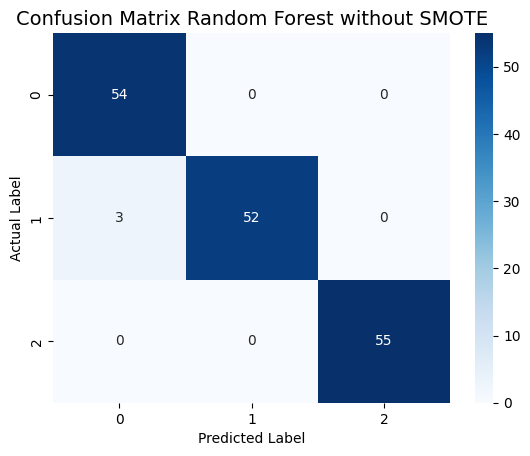

In [34]:
# Confusion Matrix of Random Forest Classifier
Y_pred_rfc_smote = rfc_smote.predict(X_test_smote)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_smote, Y_pred_rfc_smote)
report = classification_report(y_test_smote, Y_pred_rfc_smote)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report")
print(report)

# Menghitung F1-score, recall, precision, dan accuracy
f1_value = f1_score(y_test_smote, Y_pred_rfc_smote, average='weighted')
recall = recall_score(y_test_smote, Y_pred_rfc_smote, average='weighted')
precision = precision_score(y_test_smote, Y_pred_rfc_smote, average='weighted')
accuracy = accuracy_score(y_test_smote, Y_pred_rfc_smote)

# Mencetak dengan empat desimal
print(f'F1 Score: {round(f1_value, 4)}')
print(f'Recall: {round(recall, 4)}')
print(f'Precision: {round(precision, 4)}')
print(f'Accuracy: {round(accuracy, 4)}')

cm = confusion_matrix(y_test_smote, Y_pred_rfc_smote)
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title("Confusion Matrix Random Forest without SMOTE", fontsize=14, fontname="Helvetica")
plt.show()

               Feature  Importance
3  Gula Darah 2 Jam PP    0.253226
2     Gula Darah Puasa    0.229394
4                Hba1C    0.178039
1      Gula Darah Acak    0.120906
7             Sistolik    0.086307
5                  BMI    0.075939
8            Diastolik    0.029781
0                 Usia    0.019572
6      Aktivitas Fisik    0.006837


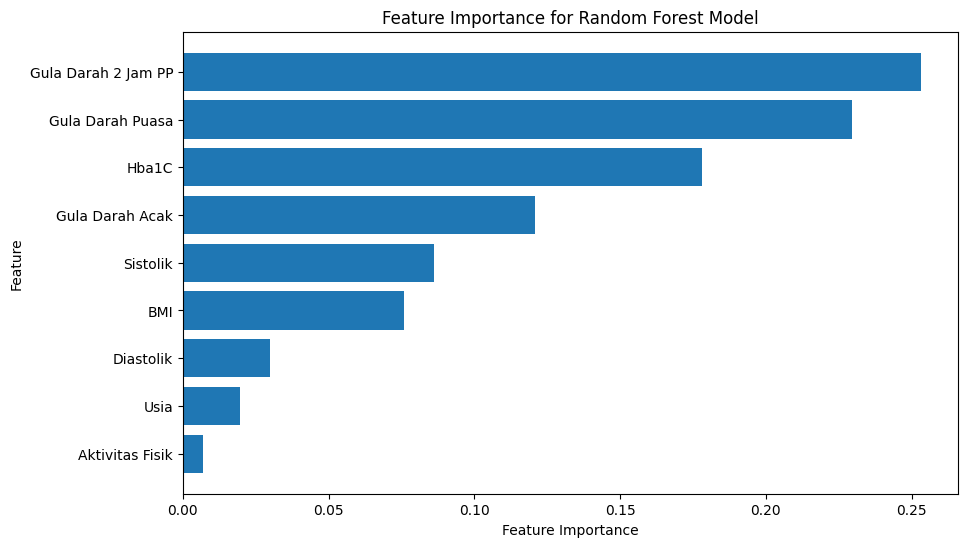

In [35]:
# Mengambil kepentingan fitur
feature_importances = rfc_smote.feature_importances_

# Membuat DataFrame untuk menampilkan kepentingan fitur
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan kepentingan fitur
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan kepentingan fitur
print(feature_importance_df)

# Plot kepentingan fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [36]:
# Konversi y_test dan y_pred menjadi DataFrame
y_test_df = pd.DataFrame(y_test_smote.values, columns=['Actual_Diagnosa'])
y_pred_df = pd.DataFrame(Y_pred_rfc_smote, columns=['Predicted_Diagnosa']).reset_index(drop=True)

# Reset indeks X_test_smote agar sesuai dengan indeks yang sudah direset pada y_test_df dan y_pred_df
X_test_reset = X_test_smote.reset_index(drop=True)

# Gabungkan X_test, y_test_df, dan y_pred_df dalam satu DataFrame
data_uji = pd.concat([X_test_reset, y_test_df, y_pred_df], axis=1)

# Tampilkan DataFrame yang sudah digabungkan
data_uji.head(50)

,Usia,Gula Darah Acak,Gula Darah Puasa,Gula Darah 2 Jam PP,Hba1C,BMI,Aktivitas Fisik,Sistolik,Diastolik,Actual_Diagnosa,Predicted_Diagnosa
0,42,132,80,129,4.573367,19.146734,0,114,73,Normal,Normal
1,54,101,250,190,9.000000,43.200000,0,150,100,DM Tipe 2,DM Tipe 2
2,30,115,92,79,4.444498,19.271665,0,94,74,Normal,Normal
3,42,96,246,210,8.100000,24.800000,0,130,89,DM Tipe 2,DM Tipe 2
4,32,112,88,80,6.000000,21.000000,0,100,74,Normal,Normal
5,60,106,299,185,8.500000,33.600000,1,120,85,DM Tipe 2,DM Tipe 2
6,56,126,115,195,7.700000,28.700000,0,118,94,DM Tipe 1,DM Tipe 1
7,33,107,83,86,4.902810,20.388760,0,103,69,Normal,Normal
8,42,131,87,112,4.800000,24.000000,1,93,68,Normal,Normal
9,33,82,84,88,5.128730,19.829839,1,117,74,Normal,Normal


Predicted_Diagnosa
DM Tipe 1    57
Normal       55
DM Tipe 2    52
Name: count, dtype: int64


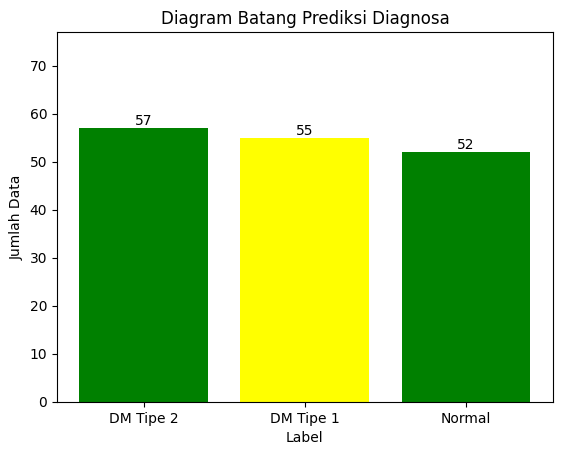

In [37]:
label_counts = data_uji['Predicted_Diagnosa'].value_counts()
print(label_counts)

# Buat diagram batang
bars = plt.bar(['DM Tipe 2', 'DM Tipe 1', 'Normal'], label_counts, color=['green', 'yellow'])

# Tambahkan label dan judul
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Diagram Batang Prediksi Diagnosa')

# Tampilkan jumlah data di atas setiap bar chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mengatur batas sumbu y
plt.ylim(0, max(label_counts) + 20)

# Tampilkan diagram
plt.show()

In [38]:
data_uji.to_excel("Data Hasil Prediksi Smote.xlsx")

In [39]:
import pickle

# Menyimpan model ke dalam file
with open('model_smote.pkl', 'wb') as file:
    pickle.dump(rfc_smote, file)

# Prediksi data baru

In [40]:
# Data baru untuk diprediksi
new_data = np.array([[30, 140, 126, 180, 7.5, 26.0, 1, 140, 80,],
                     [25, 150, 110, 175, 6.5, 23.0, 0, 130, 85],
                     [50, 150, 95, 190, 8.0, 27.5, 1, 140, 90],
                     [35, 130, 109, 85, 5, 22.0, 1, 125, 78],
                     [40, 98, 115, 255, 8.0, 33.0, 1, 120, 70]])

# Memuat model tanpa SMOTE dari file
with open('model_rf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Memuat model dengan SMOTE dari file
with open('model_smote.pkl', 'rb') as file:
    loaded_model_smote = pickle.load(file)

# Memprediksi data baru
predictions = loaded_model.predict(new_data)
smote_predictions = loaded_model_smote.predict(new_data)

print('Prediksi tanpa SMOTE:', predictions)
print('Prediksi dengan SMOTE:', smote_predictions)

Prediksi tanpa SMOTE: ['DM Tipe 2' 'DM Tipe 1' 'DM Tipe 2' 'Normal' 'DM Tipe 1']
Prediksi dengan SMOTE: ['DM Tipe 2' 'DM Tipe 1' 'DM Tipe 2' 'Normal' 'DM Tipe 1']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


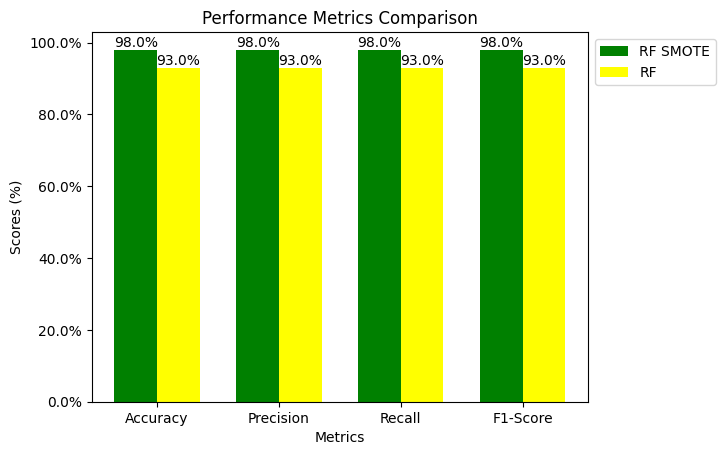

In [41]:
from matplotlib.ticker import FuncFormatter

# Data contoh (gantilah dengan hasil pengujian sesungguhnya)
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
smote_scores = [0.98, 0.98, 0.98, 0.98]
rf_scores = [0.93, 0.93, 0.93, 0.93]

# Fungsi untuk mengonversi nilai menjadi persen
def to_percent(y, position):
    s = str(round(100 * y, 2))
    if plt.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

# Warna
colors = ['green', 'green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow']

# Lebar batang
bar_width = 0.35

# Plotting
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(labels)), smote_scores, bar_width, label='RF SMOTE', color='green')
bar2 = ax.bar(np.arange(len(labels)) + bar_width, rf_scores, bar_width, label='RF', color='yellow')

# Anotasi nilai di atas batang
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, str(round(100 * yval, 2)) + '%', ha='center', va='bottom')

# Setel label sumbu dan judul
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores (%)')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(np.arange(len(labels)) + bar_width/2)
ax.set_xticklabels(labels)

# Letakkan legenda di luar diagram
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menggunakan formatter untuk sumbu y untuk menampilkan persen
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

# Tampilkan diagram batang
plt.show()